## Linear Regression

In [1]:
#creating linear data to test normal equation
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

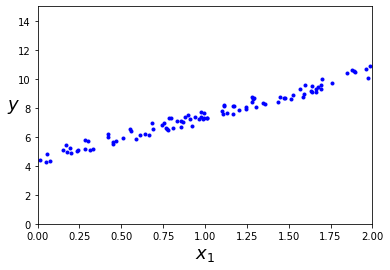

In [2]:
import matplotlib as mlp
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

plt.show()

In [3]:
#computing minimized cost function using normal equation
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[4.4300199 ],
       [3.02806869]])

In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

In [6]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.4300199 ],
       [10.48615728]])

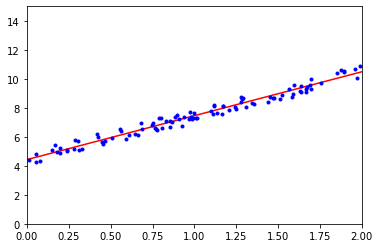

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.4300199]), array([[3.02806869]]))

In [9]:
lin_reg.predict(X_new)

array([[ 4.4300199 ],
       [10.48615728]])

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.4300199 ],
       [3.02806869]])

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[4.4300199 ],
       [3.02806869]])

## Computational complexity

the methode we just used is not fit for large number of features (normal equation and SVD used by sklearn) since its complexity is about O(n(2.4)) to O(n(3))

## Gradient Descent

gradient descient is a generic optimization algorithme capable of fiding optimal solutions to a wide range of problems. hwo it works is taht it basically tweaks parameters iteratively to minimize cost function.

the MSE cost function for  a linear regression model is a convex function, meaning there are no local minimal values in our curve, only a global value.

When using gradient descent we need to make sure our features are of similar scales (when its not the case, the computing of the value will take longer, same result, but way longer processing time)

## Batch Gradient Descent

In [12]:
#batch gradient descent is too slow on very large training sets but is fine on moderate/small ones
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.4300199 ],
       [3.02806869]])

## stochastic gradient descent

In [14]:
# stochastic gradient descent is the complete opposite of batch gradient desciend; good on big data sets but not as precise 
# due to the way it bounces around, the value given is also not the optimal ones due to the way it works.
# BUT as a plus it is a good way to get out of local minimals and get to golbal minimals
 
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t): 
    return t0/ (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients


In [15]:
theta

array([[4.42862887],
       [3.02688133]])

In [16]:
#trying the sgdregressor (does same as the function wejust defined)
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.39438969]), array([3.04815469]))

## Mini-batch Gradient Descent

works the same as the last 2 except it uses a bunch of random samples for each iteration (see page 128 for full details)




## plynomial regression

In [18]:
#we're gonna work with more complexe data (not a straight line)

m= 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

array([1.07764789, 1.16132497])

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.03896835]), array([[1.00782952, 0.50054976]]))

## learning curves

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#this function plots learning curve of a model
#blue line is with validation set while red line is with training set
def plot_learning_curves(model, X, y):
 X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
 train_errors, val_errors = [], []
 for m in range(1, len(X_train)):
     model.fit(X_train[:m], y_train[:m])
     y_train_predict = model.predict(X_train[:m])
     y_val_predict = model.predict(X_val)
     train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
     val_errors.append(mean_squared_error(y_val, y_val_predict))
 plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
 plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")


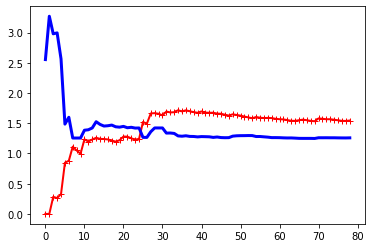

In [25]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

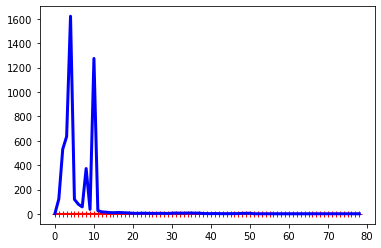

In [28]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

# Regularized Linear Models

## 1-Ridge Regression

ridge regression is pretty much linear regression with constraints (to avoid overfitting)

In [31]:
#performing ridge regression using closed form solution
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])


array([[5.17809275]])

In [32]:
#using stochastic gradient descent

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.18002623])

## 2-Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (or lasso Regression) is another regularized version of linear regression

In [34]:
#example of using lasso class
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.13557598])

## 3-Elastic Net

middle ground between ridge regression and lasso regression; the regularization term is a simple mix of both ridge and lasso's regularization terms and we can control the mix ratio r

In [36]:
#short example of using elastic net
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.12964731])

# which to use when ? 

by default we go for ridge, but sometimes when we think some features matter less than others we go for elastic or lasso, and even then the prefered of the two is elastic since lasso can be erratic in deleting weights of features.

## Early Stopping

this is basically training and stopping the training the moment the validation error reaches a minimum.

In [41]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [42]:
#basic implementation of early stopping

from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
 ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                    penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

# Logistic Regression

## 1-Estimating Probabilities

it works teh same as linear regression except instead of outputing the weighted sum of the input features plus a bias term, it instead outputs teh logistic of that result (number between 0 and 1)

## 2-Training and cost function

## 3-Decision boundaries

In [46]:
#loading the data
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris virginica, else 0

In [47]:
#training logistic model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

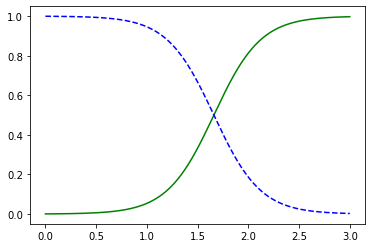

In [48]:
#looking at the model's estimated probabilities for flower petals variying from 0 to 3 cm 
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

In [49]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

## 4-Softmax Regression

In [50]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [51]:
softmax_reg.predict([[5, 2]])

array([2])

In [52]:
 softmax_reg.predict_proba([[5, 2]])


array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])